In [19]:
import yfinance as yF 
import pandas as pd
import pandas_datareader.data as pdr
import yfinance
yfinance.pdr_override()

import datetime as dt
import pandas_ta as ta

import mplfinance as mpf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.options.display.float_format = '{:.2f}'.format

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [65]:
Cotacoes = yF.Ticker("PETR3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="3mo")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-17 00:00:00-03:00,37.49,37.75,37.32,37.46,10628800,0.00,0.00
2024-04-18 00:00:00-03:00,37.59,38.20,37.18,37.37,10453300,0.00,0.00
2024-04-19 00:00:00-03:00,37.50,38.97,37.34,38.89,18589200,0.00,0.00
2024-04-22 00:00:00-03:00,39.09,39.92,38.87,39.83,13007200,0.00,0.00
2024-04-23 00:00:00-03:00,39.64,39.90,39.27,39.56,14932800,0.00,0.00


In [67]:
dados.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-11 00:00:00-03:00,40.91,41.28,40.84,41.11,6295200,0.00,0.00
2024-07-12 00:00:00-03:00,41.20,41.28,40.86,40.88,4707000,0.00,0.00
2024-07-15 00:00:00-03:00,41.00,41.76,40.94,41.46,9383600,0.00,0.00
2024-07-16 00:00:00-03:00,41.42,41.49,40.98,41.25,6624000,0.00,0.00
2024-07-17 00:00:00-03:00,41.17,41.58,41.17,41.40,3002900,0.00,0.00


In [69]:
ativos = ["PETR3.SA"]
data_inicial = "2023-01-01"
data_final = "2023-10-23"

cotacoes = pdr.get_data_yahoo(ativos, data_inicial, data_final)
cotacoes = pdr.get_data_yahoo(ativos, data_inicial, data_final)["Adj Close"]
cotacoes.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2023-01-02   18.85
2023-01-03   18.59
2023-01-04   18.90
2023-01-05   19.51
2023-01-06   19.39
Name: Adj Close, dtype: float64

In [71]:
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-17 00:00:00-03:00,37.49,37.75,37.32,37.46,10628800,0.00,0.00
2024-04-18 00:00:00-03:00,37.59,38.20,37.18,37.37,10453300,0.00,0.00
2024-04-19 00:00:00-03:00,37.50,38.97,37.34,38.89,18589200,0.00,0.00
2024-04-22 00:00:00-03:00,39.09,39.92,38.87,39.83,13007200,0.00,0.00
2024-04-23 00:00:00-03:00,39.64,39.90,39.27,39.56,14932800,0.00,0.00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-11 00:00:00-03:00,40.91,41.28,40.84,41.11,6295200,0.00,0.00
2024-07-12 00:00:00-03:00,41.20,41.28,40.86,40.88,4707000,0.00,0.00
2024-07-15 00:00:00-03:00,41.00,41.76,40.94,41.46,9383600,0.00,0.00
2024-07-16 00:00:00-03:00,41.42,41.49,40.98,41.25,6624000,0.00,0.00
2024-07-17 00:00:00-03:00,41.17,41.58,41.17,41.40,3002900,0.00,0.00


In [75]:
dados.ta.bbands(length=5, std=2.0).head(10)

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2024-04-17 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-04-18 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-04-19 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-04-22 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-04-23 00:00:00-03:00,36.55,38.62,40.69,10.71,0.73
2024-04-24 00:00:00-03:00,37.25,39.01,40.76,8.99,0.61
2024-04-25 00:00:00-03:00,38.66,39.59,40.51,4.68,0.87
2024-04-26 00:00:00-03:00,38.91,39.99,41.07,5.41,0.92
2024-04-29 00:00:00-03:00,38.68,40.35,42.01,8.26,0.88


In [77]:
leng = 5
desv = 2.0

df2 = dados.ta.bbands(length=leng, std= desv)

<Axes: xlabel='Date'>

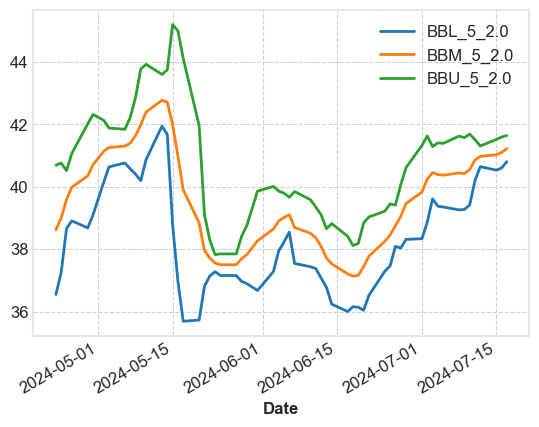

In [79]:
df2.iloc[:,:3].plot()

<Axes: xlabel='Date'>

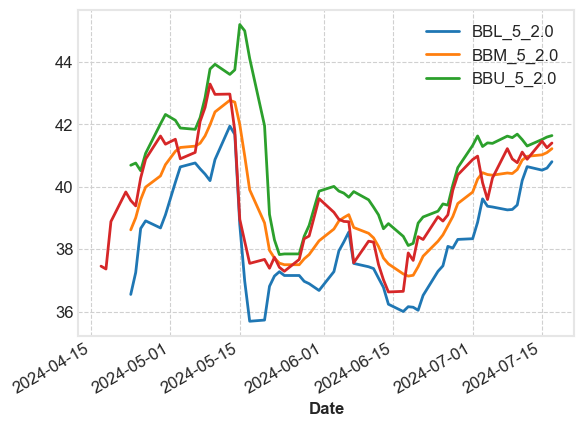

In [81]:
(df2).iloc[:,:3].plot()
dados['Close'].plot()

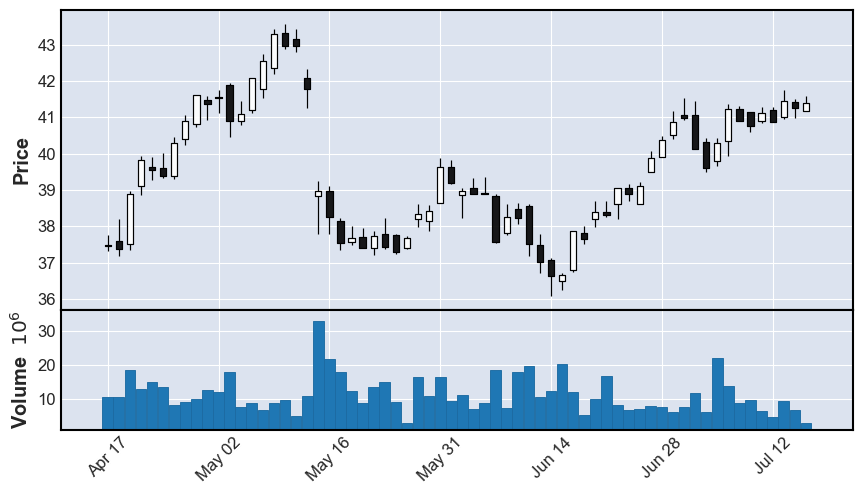

In [83]:
mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True)

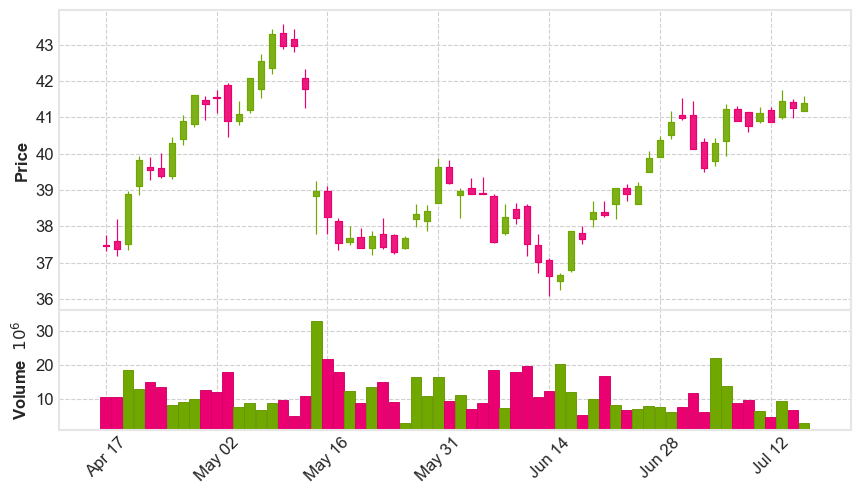

In [85]:
mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True,style='binance')

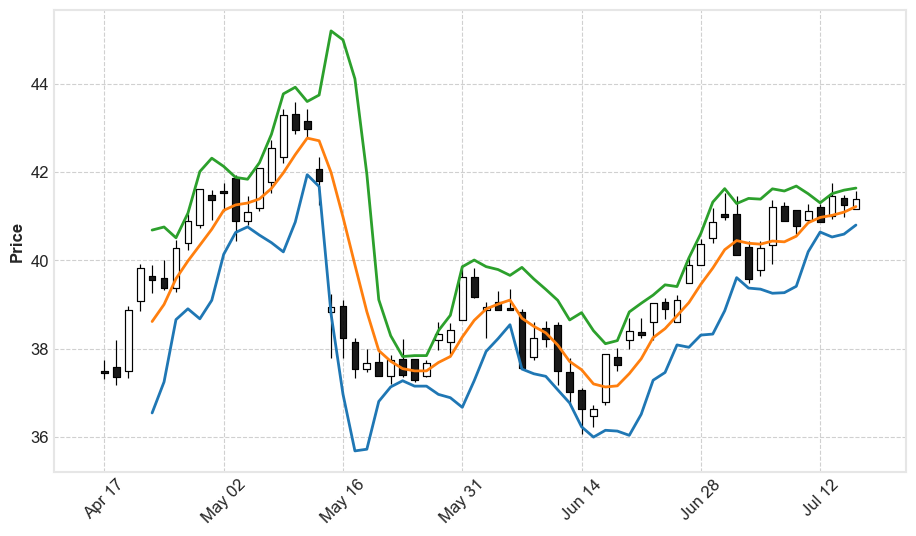

In [87]:
fig, ax = plt.subplots(figsize = (11,6))
mpf.plot(dados, type = 'candle', ax= ax)
df2['aux'] = range(0,dados.shape[0])
plt.plot(df2['aux'], df2.iloc[:,:3]);

<Axes: xlabel='Date', ylabel='Price'>

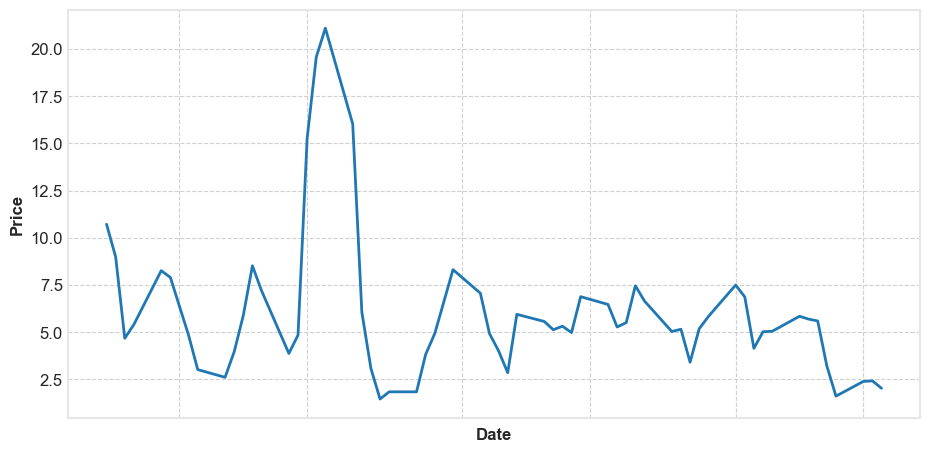

In [99]:
fig, ax = plt.subplots(figsize = (11,6))
mpf.plot(dados, type = 'candle', ax= ax)
(df2).iloc[:,3].plot(ax=ax)

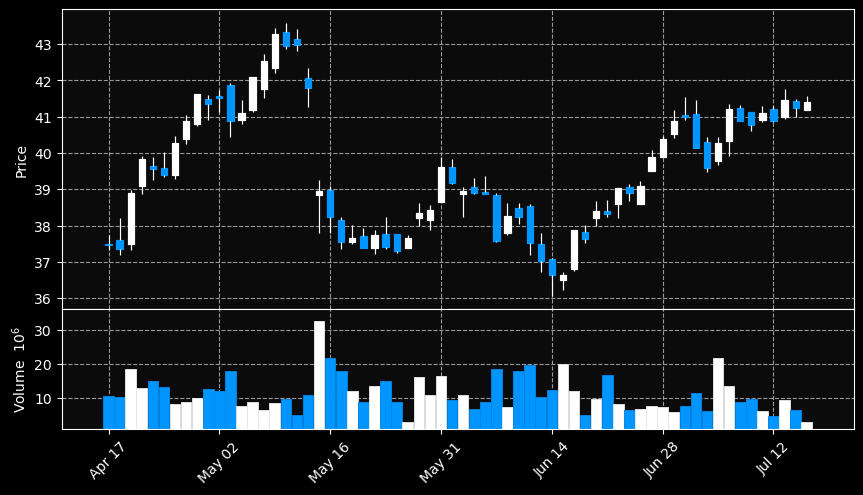

In [101]:
mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True,style='nightclouds')